
# Set 1

 Q1) Look at the data given below. Plot the data, find the outliers and find out  μ,σ,σ^2

In [27]:
# importing data
import pandas as pd
q1=pd.read_csv("set1_Q1.csv")
q1

,Name of company,Measure X
0,Allied Signal,0.2423
1,Bankers Trust,0.2553
2,General Mills,0.2541
3,ITT Industries,0.2414
4,J.P.Morgan & Co.,0.2962
5,Lehman Brothers,0.2825
6,Marriott,0.2581
7,MCI,0.2439
8,Merrill Lynch,0.4026
9,Microsoft,0.3295


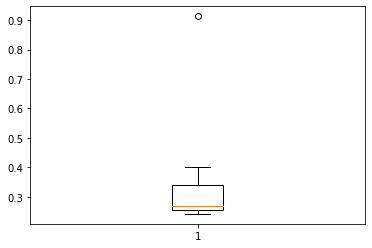

In [28]:
# plotting data
import matplotlib.pyplot as plt
# boxplot
name_of_company=q1["Name of company"]
plt.boxplot(q1["Measure X"])
plt.show()

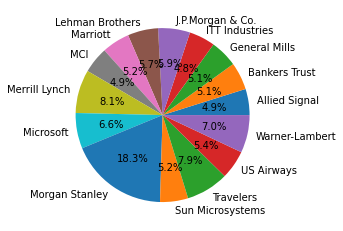

In [29]:
#pie chart
name_of_company=q1["Name of company"]
plt.pie(q1["Measure X"],labels=name_of_company,autopct='%1.1f%%')
plt.show()

In [30]:
q1["Measure X"].var()

0.028714661238095233

In [31]:
q1["Measure X"].std()

0.16945400921222029

# Set 2

Q1.	The time required for servicing transmissions is normally distributed with  = 45 minutes and  = 8 minutes. The service manager plans to have work begin on the transmission of a customer’s car 10 minutes after the car is dropped off and the customer is told that the car will be ready within 1 hour from drop-off. What is the probability that the service manager cannot meet his commitment? 

In [32]:
'''To find the probability that the service manager cannot meet his commitment,
i.e we have to find P(X>50)'''

'To find the probability that the service manager cannot meet his commitment,\ni.e we have to find P(X>50)'

In [33]:
import scipy
from scipy import stats
prob=1-stats.norm.cdf(50,45,8)
prob

0.26598552904870054

Q2.	The current age (in years) of 400 clerical employees at an insurance claims processing center is normally distributed with mean  = 38 and Standard deviation  =6. For each statement below, please specify True/False. If false, briefly explain why.

In [34]:
# X~N (μ=38, σ(sq)=36 )
#A) Finding prob.that the processing center are older than 44 than between 38 and 44
# i.e P[38<x<44]
import scipy
from scipy import stats
prob1=round((stats.norm.cdf(44,38,6)-stats.norm.cdf(38,38,6))*400)
prob1

137

In [35]:
#B) A training program for employees under the age of 30 at the center would be expected to attract about 36 employees 
# i.e P[x<=30]
prob2=round(stats.norm.cdf(30,38,6)*400)
prob2

36

Q4.	Let X ~ N(100, 202). Find two values, a and b, symmetric about the mean, such that the probability of the random variable taking a value between them is 0.99. 

In [36]:
# finding z-score value
import scipy
from scipy import stats
round(stats.norm.ppf(0.005),3)

-2.576

In [37]:
round(stats.norm.ppf(0.995),3)

2.576

In [38]:
# Finding values of a & b
a=20*(-2.576)+100
a

48.48

In [39]:
b=20*(2.576)+100
b

151.52

Q5)Consider a company that has two different divisions. The annual profits from the two divisions are independent and have distributions Profit1 ~ N(5, 32) and Profit2 ~ N(7, 42) respectively. Both the profits are in $ Million. Answer the following questions about the total profit of the company in Rupees. Assume that $1 = Rs. 45
A.	Specify a Rupee range (centered on the mean) such that it contains 95% probability for the annual profit of the company.
B.	Specify the 5th percentile of profit (in Rupees) for the company
C.	Which of the two divisions has a larger probability of making a loss in a given year?


In [40]:
# profit1~N(5,9)
# profit2~N(7,16)
# total_profit~N(12,25)  #according to addition property of normal distribution
# In rupees,
mean_of_totalprofit=12*45
mean_of_totalprofit
sd_of_totalprofit=5*45
sd_of_totalprofit


225

In [41]:
# A)
import scipy
from scipy import stats
stats.norm.interval(0.95,mean_of_totalprofit,sd_of_totalprofit)

(99.00810347848784, 980.9918965215122)

In [42]:
# B)
zscore=stats.norm.ppf(0.05)
zscore

-1.6448536269514729

In [43]:
percentile=mean_of_totalprofit+(zscore*sd_of_totalprofit)
percentile

169.9079339359186

In [44]:
# C)
# loss is when profit < 0
prob_profit1=stats.norm.cdf(0,5,3)
prob_profit1


0.0477903522728147

In [45]:
prob_profit2=stats.norm.cdf(0,7,4)
prob_profit2

0.040059156863817086

# Set 3

Que no 5

In January 2005, a company that monitors Internet traffic (WebSideStory) reported that its sampling revealed that the Mozilla Firefox browser launched in 2004 had grabbed a 4.6% share of the market.
If the sample were based on 2,000 users, could Microsoft conclude that Mozilla has a less than 5% share of the market?

null_hypothesis >= 5%
alternate hypothesis < 5%

In [46]:
p_hat =0.046
p =0.05
n =2000

In [47]:
# z_score = p_hat-p/(p(1-p)/n)**0.5
import numpy as np
z_score = (p_hat-p)/(np.sqrt((p*(1-p))/n))
z_score

-0.820782681668124

In [48]:
import scipy.stats as stats
p_value = stats.norm.sf(0.821)
p_value

0.20582313410777142

In [49]:
#Find Probability assuming null hyposthesis, so as to compare with Type-1 error α = 0.05
if p_value>0.05:
    print("""No: Microsoft could not conclude that Mozilla has a less
    than 5% share of the market even if the sample were 
    based on 2,000 users""")
else:
    print("Yes")

No: Microsoft could not conclude that Mozilla has a less
    than 5% share of the market even if the sample were 
    based on 2,000 users


# Set 4

Que no 3

Auditors at a small community bank randomly sample 100 withdrawal transactions made during the week at an ATM machine located near the bank’s main branch. Over the past 2 years, the average withdrawal amount has been $50 with a standard deviation of $40. Since audit investigations are typically expensive, the auditors decide to not initiate further investigations if the mean transaction amount of the sample is between $45 and $55. What is the probability that in any given week, there will be an investigation?

In [50]:
mean = 50
std = 40
n = 100
d_f = 100 - 1 #degree of freedom
#the probability that there will be an investigation,
#if the mean transactions amount increases more than 55 USD or less than 45 USD
# no investigation if the mean transactions amount remains between 45 to 55 USD

In [51]:
# we will go for t-distribution as population standard deviation is unknown
t_forty_five = (45-50)/(40/np.sqrt(100))
t_forty_five

-1.25

In [52]:
t_fifty_five = (55-50)/(40/np.sqrt(100))
t_fifty_five

1.25

In [53]:
forty_five = stats.t.cdf(t_forty_five, df = d_f)
forty_five

0.10712316878419327

In [54]:
fifty_five = stats.t.cdf(t_fifty_five, d_f)
fifty_five

0.8928768312158067

In [55]:
prob = fifty_five - forty_five
prob

0.7857536624316135

In [56]:
np.round(stats.t.interval(alpha = prob, df = d_f, loc = mean, scale = std/np.sqrt(n)),)

array([45., 55.])

In [57]:
print('The probability that in any given week, there will be an investigation is',np.round((1-prob)*100,1),'%')

The probability that in any given week, there will be an investigation is 21.4 %


Q.no 4

The auditors from the above example would like to maintain the probability of investigation to 5%. Which of the following represents the minimum number transactions that they should sample if they do not want to change the thresholds of 45 and 55? Assume that the sample statistics remain unchanged

In [58]:
x_bar = 45
s_std = 40
mew = 50

In [59]:
t = np.round(stats.t.ppf(0.025, df = 249),2)
t

-1.97

In [60]:
# t_value = (x_bar - mew)/(sample_std/n**0.5)
# t = 45-50 or z = 55-50 z = +/- 5

In [61]:
# t = 5/(40/n**0.5)
# n = (sample_standard_deviation*tscore)/(sample_mean=population_mean)
n = ((s_std*abs(t)) / (5))**2
n

248.3776

In [62]:
print('The Auditors would like to maintain the probability of investigation to 5%, they should sample',np.round(n,),'transactions if they do not want to change the thresholds of 45 to 55')

The Auditors would like to maintain the probability of investigation to 5%, they should sample 248.0 transactions if they do not want to change the thresholds of 45 to 55


In [63]:
df= n-1
print(n, df)

248.3776 247.3776


In [64]:
np.round(stats.t.interval(alpha = 0.95, df = df, loc = mew, scale = s_std/np.sqrt(n)),)

array([45., 55.])

The Auditors would like to maintain the probability of investigation to 5%, they should sample 248.0 transactions if they do not want to change the thresholds of 45 to 55
248.3776 247.3776